In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
fname="/Users/ed/Google Drive/CSDA_1050/data/df_newOpFlag.csv"

In [3]:
superframe=pd.read_csv(fname)

In [4]:
list(superframe)

['Unnamed: 0',
 'Unnamed: 0.1',
 'npi',
 'generic_name',
 'ActiveIngredient',
 'DOB',
 'EXCLDATE',
 'EXCLTYPE',
 'GENERAL',
 'ZIP',
 'description_flag',
 'drug_name',
 'good',
 'infoYear',
 'nppes_provider_city',
 'nppes_provider_first_name',
 'nppes_provider_last_org_name',
 'nppes_provider_state',
 'specialty_description',
 'total_30_day_fill_count',
 'total_claim_count',
 'total_day_supply',
 'total_drug_cost',
 'flag1',
 'flag2',
 'flag']

In [5]:
pd.options.display.mpl_style = 'default'
superframe.boxplot()

OptionError: 'You can only set the value of existing options'

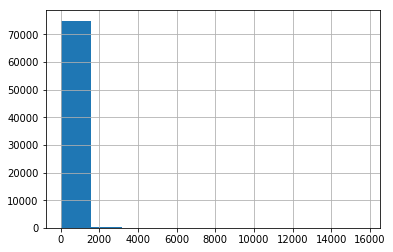

In [6]:
superframe.total_claim_count.hist()

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

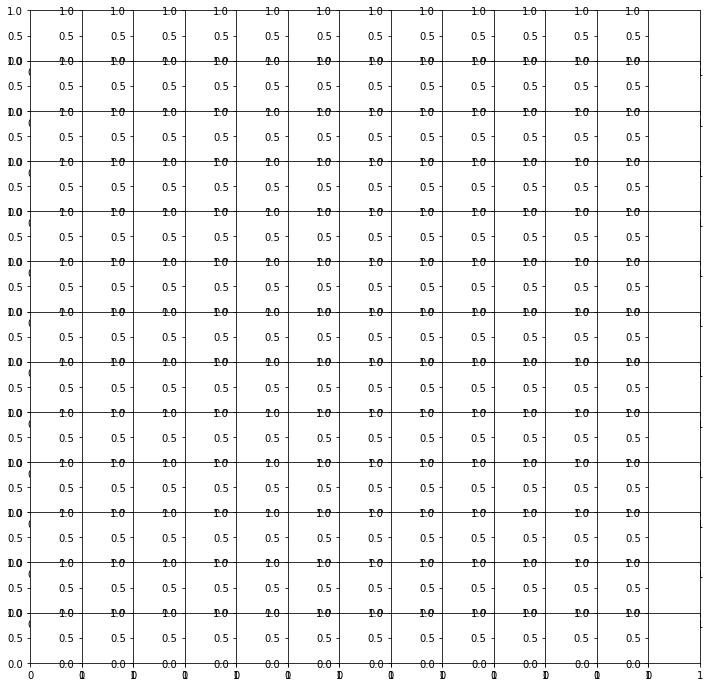

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(superframe, alpha=0.2, figsize=(12, 12), diagonal='kde')

In [21]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(superframe)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
superframe.generic_name[superframe.good==0]

In [ ]:
superframe.select_dtypes(include=['float', 'int'])

In [ ]:
superframe["total_day_supply"].hist()


In [ ]:

superframe["total_day_supply"].apply(np.log).hist()


In [ ]:
superframe["total_30_day_fill_count"].hist()


In [ ]:
superframe["total_30_day_fill_count"].apply(np.log).hist()


In [ ]:
superframe["total_claim_count"].hist()


In [ ]:
superframe["total_claim_count"].apply(np.log).hist()


In [ ]:
superframe["total_drug_cost"].hist()


In [ ]:
superframe["total_drug_cost"].apply(np.log).hist()


In [ ]:
superframe["total_day_supply"].hist()


In [ ]:
superframe["total_day_supply"].apply(np.log).hist()


In [ ]:
X=superframe.select_dtypes(include=['int'])

In [10]:
X=superframe[['total_day_supply','total_30_day_fill_count','total_drug_cost']]

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [12]:
#labels = kmeans.predict(superframe.generic_name)
# Centroid values
C = kmeans.cluster_centers_

In [13]:
print(C) # From sci-kit learn

[[2.71027852e+03 9.71548771e+01 3.87622593e+03]
 [7.89633636e+04 3.99843636e+03 2.58771932e+06]
 [3.17102593e+04 1.22761296e+03 9.12972083e+05]
 [1.92981190e+04 6.97457203e+02 2.10470698e+05]]


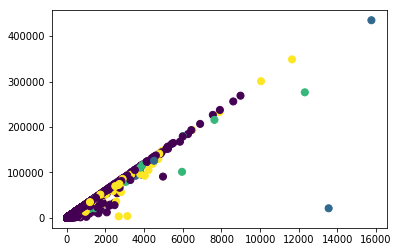

In [14]:
plt.scatter(X['total_30_day_fill_count'], X['total_day_supply'], s=50,c=y_kmeans);

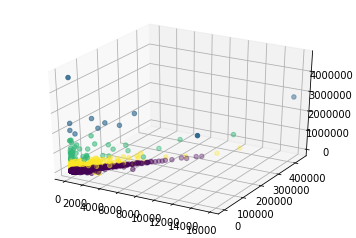

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['total_30_day_fill_count'],X['total_day_supply'],X['total_drug_cost'], c=y_kmeans);

In [171]:
y_kmeans.shape

(75220,)

In [172]:
superframe.generic_name.unique()

array(['AMOXICILLIN', 'AZITHROMYCIN', 'FLUTICASONE PROPIONATE', ...,
       'NALBUPHINE HCL', 'PNV WITH CA,NO.71/IRON/FA',
       'PNV119/IRON FUMARATE/FA/DSS'], dtype=object)

In [129]:
X.shape

(75220, 2)

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');